In [1]:
import pandas as pd

In [2]:
gov_df = pd.read_csv('../../data/raw/nyc_gov_housing_violation_no_filter.csv')
complaint_df = pd.read_csv('../../data/raw/nyc_user_housing_violation_no_filter.csv')

In [3]:
complaint_df['receiveddate'] = pd.to_datetime(complaint_df['receiveddate'])
complaint_df['month'] = complaint_df['receiveddate'].dt.to_period("M")

gov_df['inspectiondate'] = pd.to_datetime(gov_df['inspectiondate'])
gov_df['month'] = gov_df['inspectiondate'].dt.to_period("M")

In [5]:
user_complaints_by_street_month = (
    complaint_df.groupby(['block', 'month']).size().reset_index(name='complaints_count')
)

govt_actions_by_street_month = (
    gov_df.groupby(['block', 'month']).size().reset_index(name='action_count')
)
merged_df = pd.merge(user_complaints_by_street_month, govt_actions_by_street_month, on=['block', 'month'], how='outer')
merged_df = merged_df.fillna(0)

In [8]:
merged_df = merged_df.sort_values(by='complaints_count',ascending=False)

In [9]:
from tabulate import tabulate

In [10]:
print(tabulate(merged_df.head(15), headers='keys', tablefmt="psql", showindex=False))

+---------+---------+--------------------+----------------+
|   block | month   |   complaints_count |   action_count |
|---------+---------+--------------------+----------------|
|    3143 | 2021-02 |               1040 |             96 |
|    3143 | 2022-01 |                900 |            247 |
|    3143 | 2022-02 |                868 |            229 |
|    1511 | 2017-11 |                847 |             44 |
|    3143 | 2021-03 |                795 |            158 |
|     579 | 2023-03 |                762 |             26 |
|    3143 | 2023-03 |                734 |            118 |
|    1511 | 2019-02 |                733 |             52 |
|    3143 | 2022-03 |                724 |             92 |
|    3143 | 2020-01 |                711 |            147 |
|    3143 | 2020-02 |                699 |            109 |
|    1511 | 2019-11 |                697 |             49 |
|    2174 | 2015-01 |                681 |             51 |
|    3143 | 2021-01 |                663

/var/folders/_f/vkg_0cs10979h47nv_958bdw0000gp/T/ipykernel_27849/1514853692.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['year'] = pd.to_datetime(merged_df['month'].astype(str)).dt.year


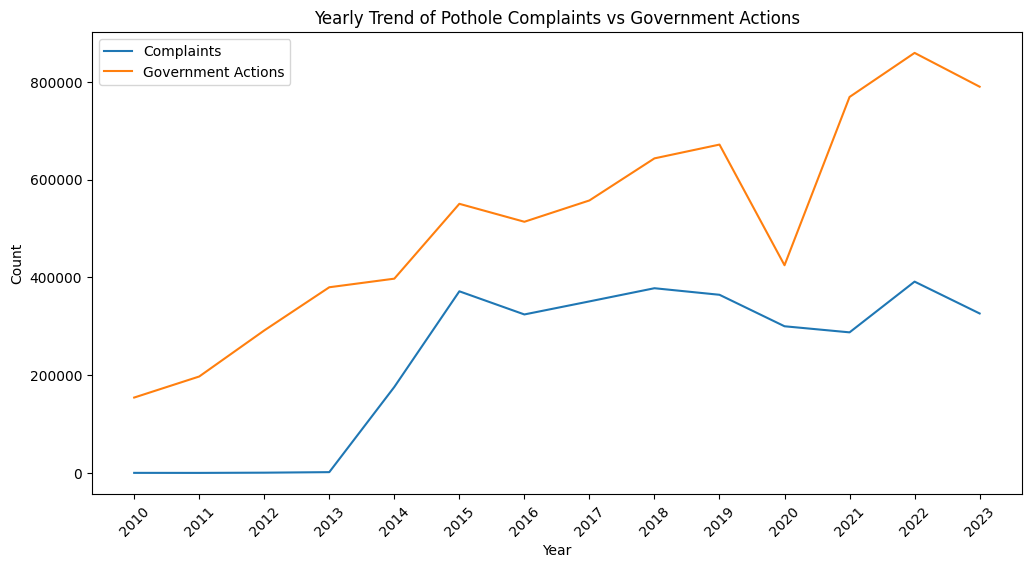

In [11]:
import matplotlib.pyplot as plt

# Extract year from 'month' for aggregation
merged_df['year'] = pd.to_datetime(merged_df['month'].astype(str)).dt.year

# Aggregate data by year
yearly_data = merged_df.groupby('year').agg({'complaints_count': 'sum', 'action_count': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['complaints_count'], label='Complaints')
plt.plot(yearly_data['year'], yearly_data['action_count'], label='Government Actions')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Trend of Housing Code Complaints vs Government Actions')
plt.legend()
plt.xticks(yearly_data['year'], rotation=45)  # Ensure all years are displayed as x-ticks

plt.show()
